In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.fftpack as sf
import scipy.signal as sig

%config InlineBackend.figure_format='retina'
plt.rcParams['figure.figsize'] = (12, 6)

In [ ]:
calcularFrequenciaAngular = lambda frequenciaHertz: (2 * np.pi * frequenciaHertz)

frequenciaAmostragem = 2e6
amplitudeSinal = 10
frequenciaSinal = 5e3

tempo = np.arange(0, 2.6e-3, 1 / frequenciaAmostragem)

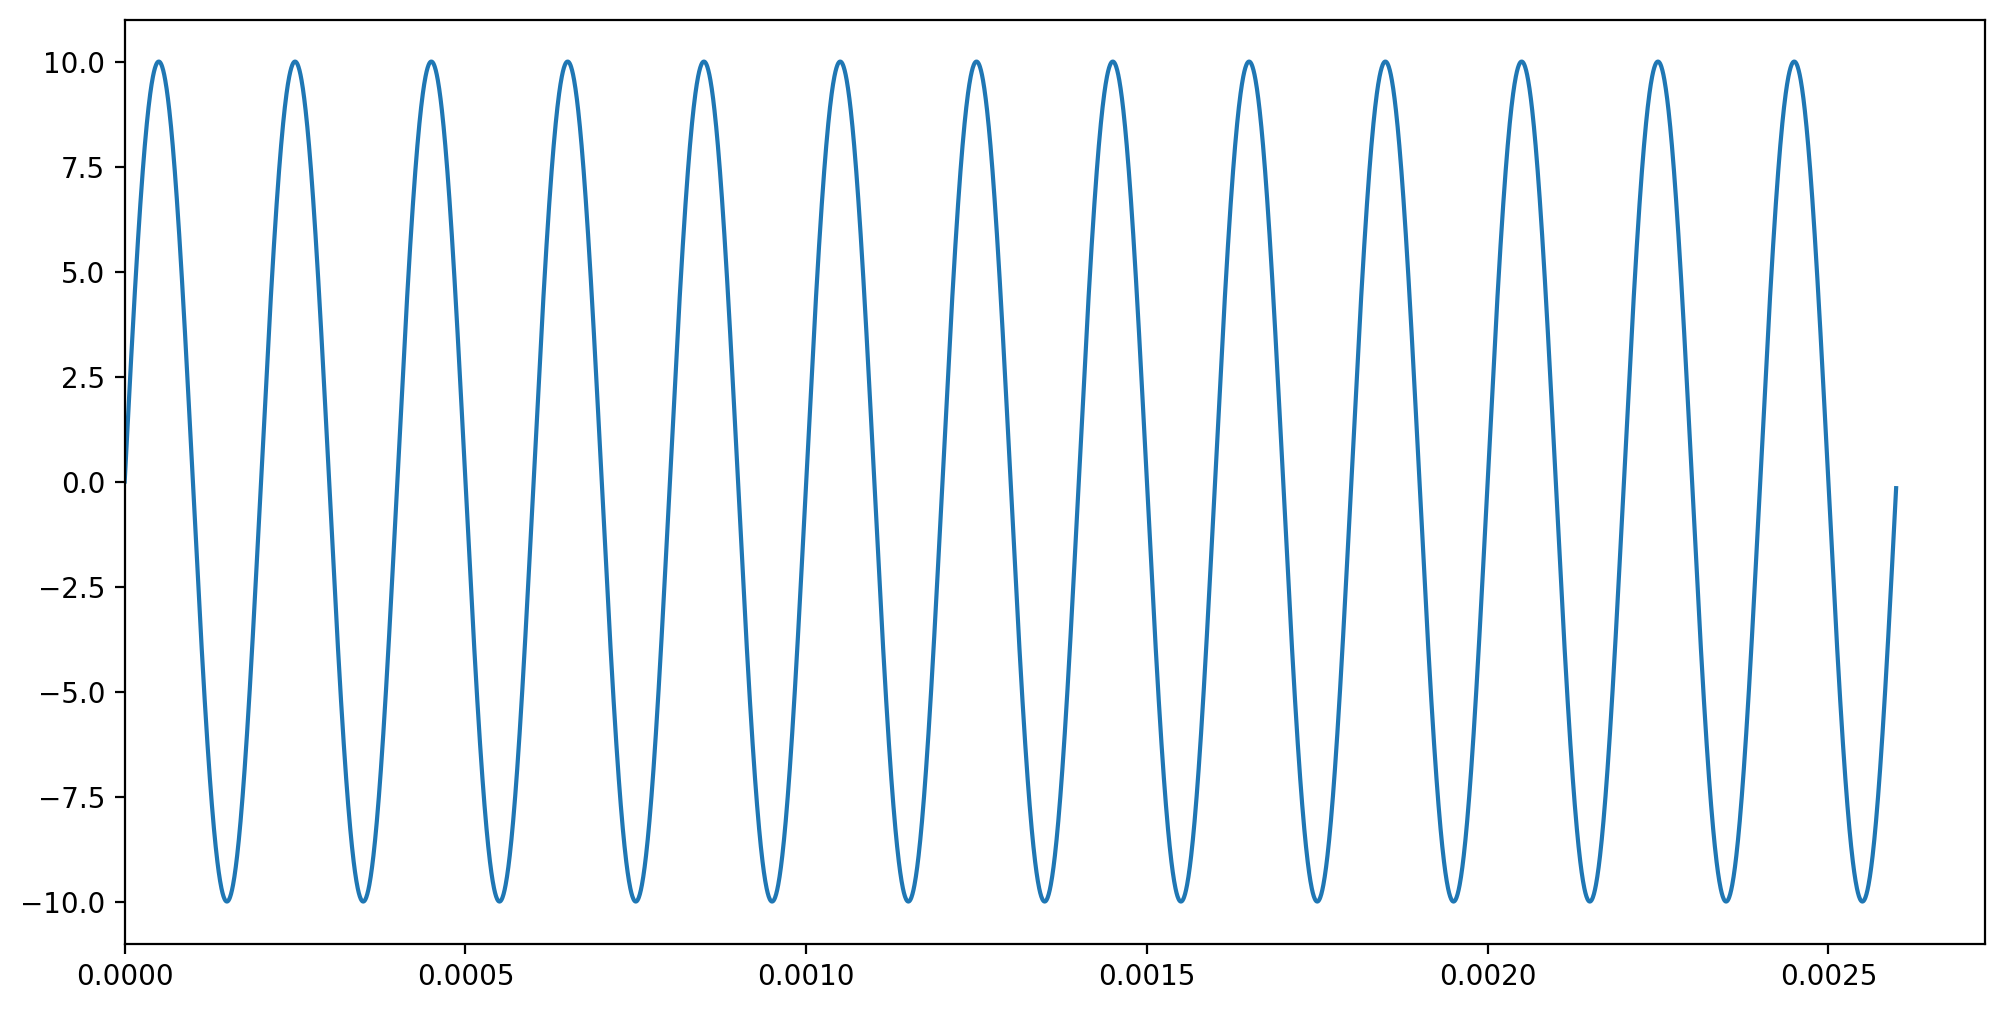

In [ ]:
sinal = amplitudeSinal*np.sin(calcularFrequenciaAngular(frequenciaSinal)*tempo)

plt.plot(tempo, sinal)
plt.xlim(0)
plt.show()

# Geração do ruído branco

O ruído branco pode ser construído a partir da amostragem de uma distribuição normal

$$
p(t) = \mathcal{N}(\mu_x,\,\sigma_x) = \frac{1}{\sigma_x\sqrt{2\pi}} e^{-(\frac{1}{2\sigma_x^2})(t-\mu_x)^2}
$$

Em que $\mu_x$ é o valor médio do sinal e $\sigma_x$ o valor do desvio padrão. De modo que a cada instante de tempo t, é sorteado um valor da distribuição normal.

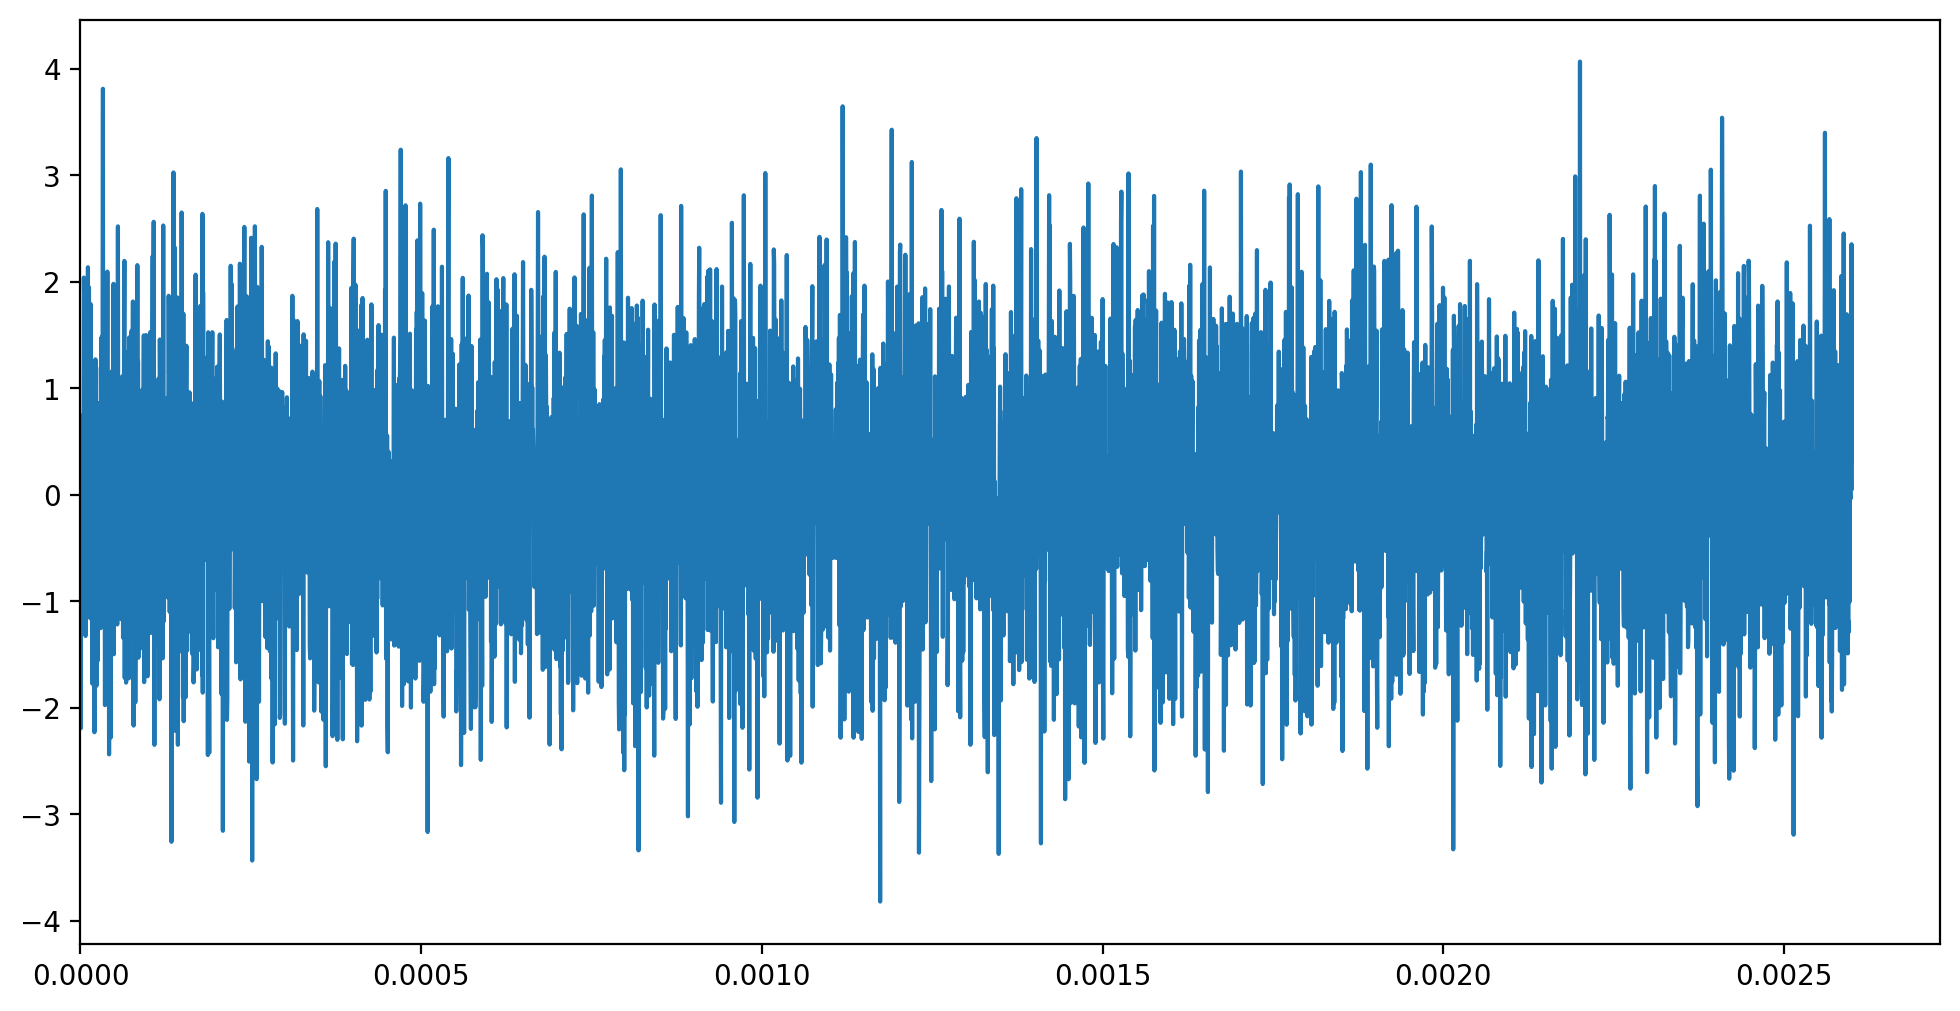

In [ ]:
# Gráfico do ruído
media = 0
desvioPadrao = 1.10
ruidoBranco = np.random.normal(media, desvioPadrao, len(tempo)) # Sortear de distribuição normal

plt.plot(tempo, ruidoBranco)
plt.xlim(0)
plt.show()

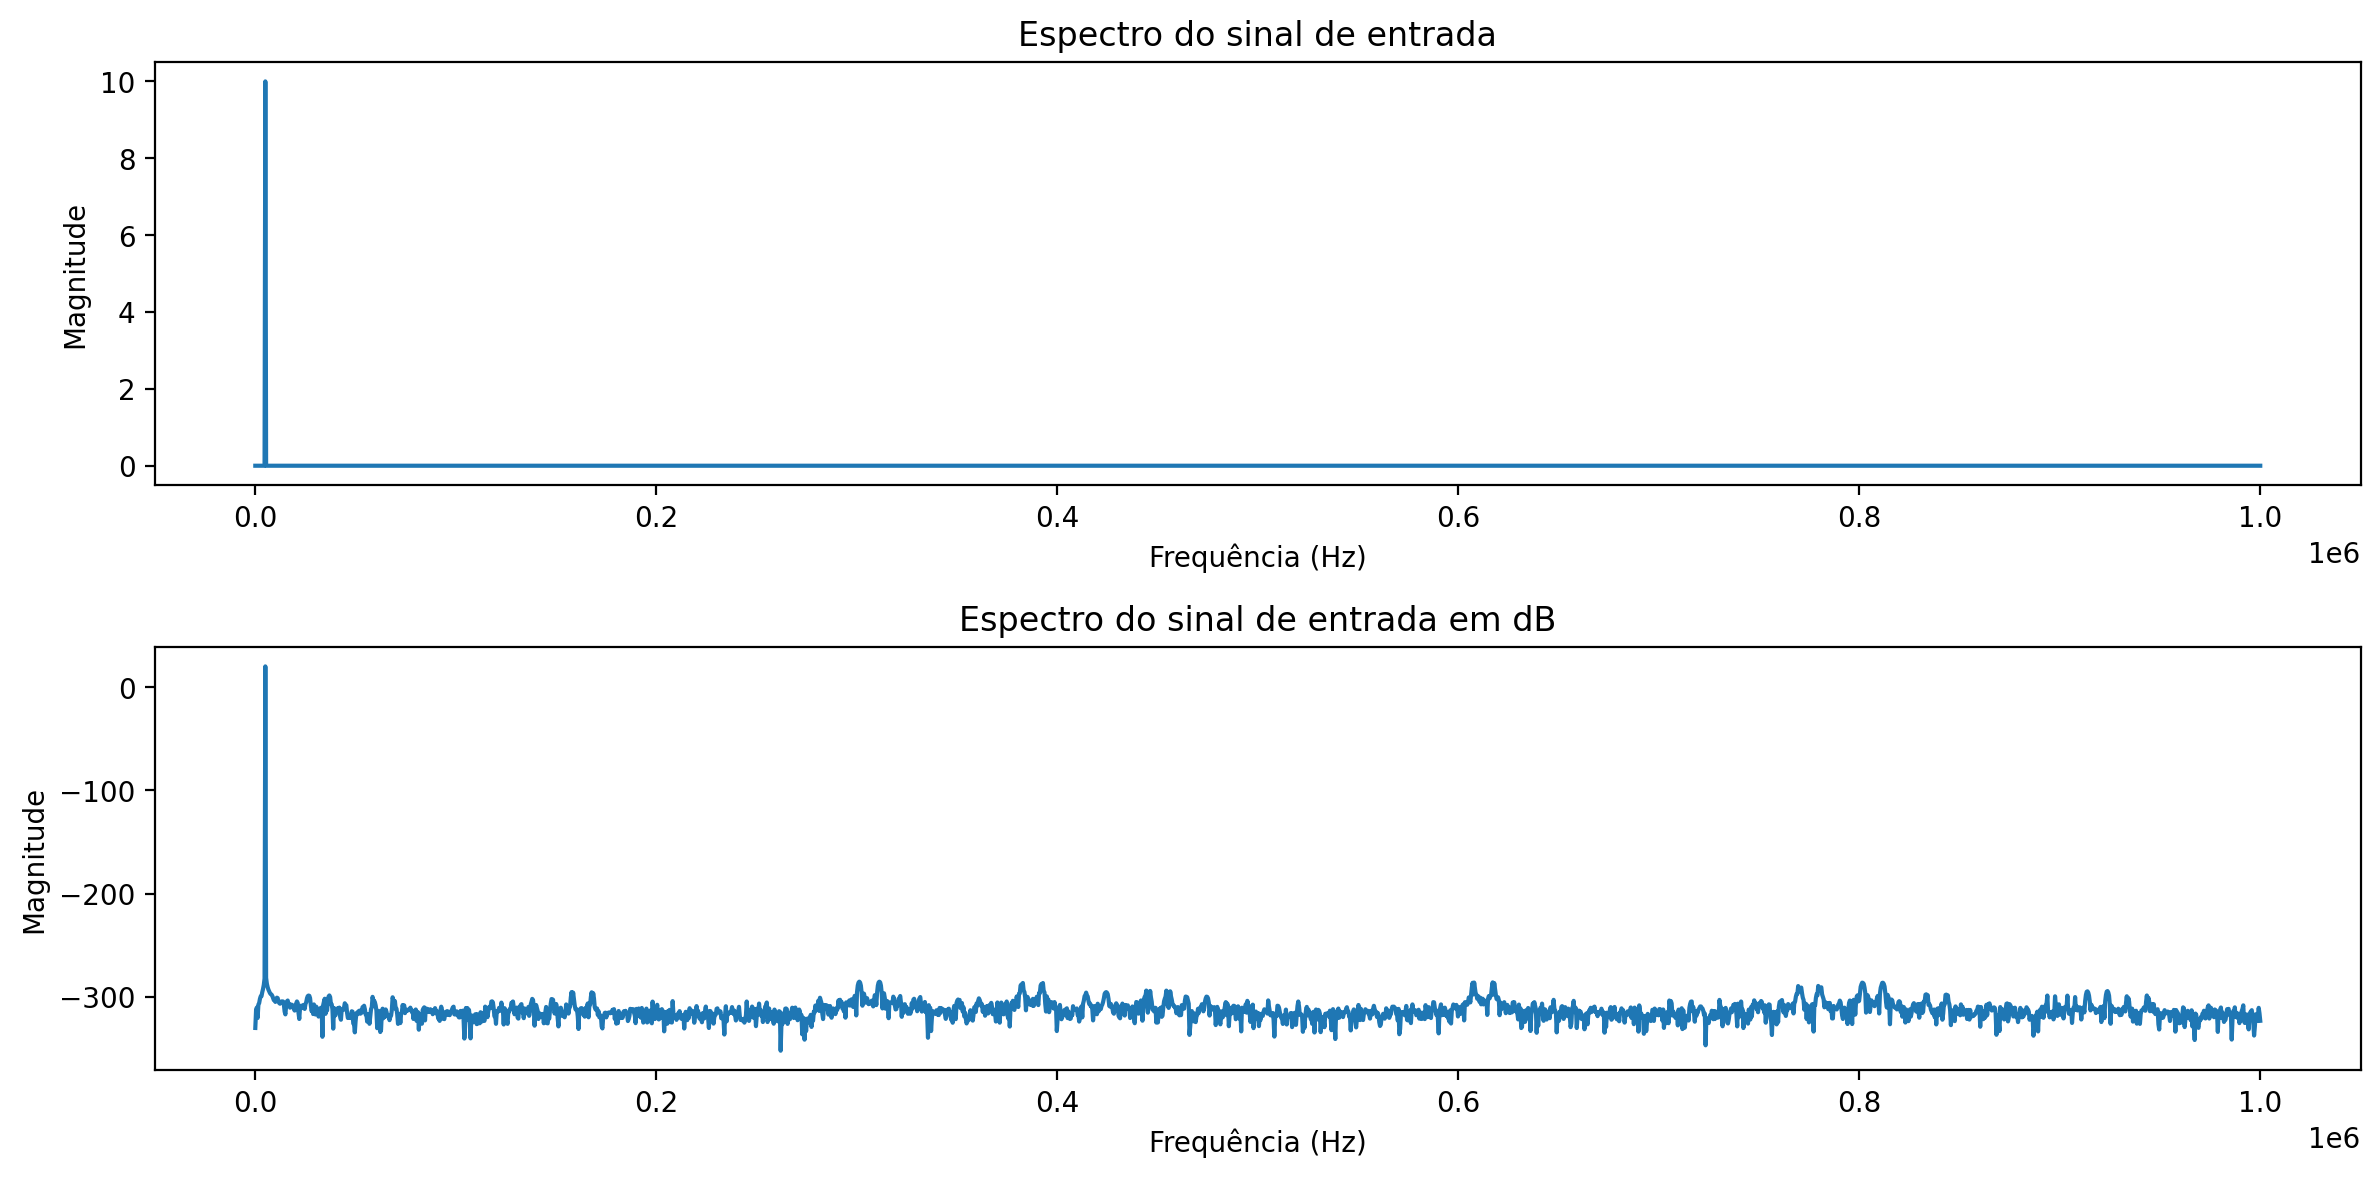

In [ ]:
# Análise spectral do sinal

sinalFFT = abs(sf.fft(sinal))
sinalComprimento = np.size(sinal)
eixoFrequenciaSinal =  (frequenciaAmostragem / 2) * np.linspace(0, 1, int(sinalComprimento/2))
sinalMagnitude = (2 / sinalComprimento) * abs(sinalFFT[0:np.size(eixoFrequenciaSinal)])

# Sinal de entrada
plt.subplot(2, 1, 1)
plt.plot(eixoFrequenciaSinal, sinalMagnitude)
plt.title('Espectro do sinal de entrada')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Análise espectral
plt.subplot(2, 1, 2)
plt.plot(eixoFrequenciaSinal, 20*np.log10(sinalMagnitude))
plt.title('Espectro do sinal de entrada em dB')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

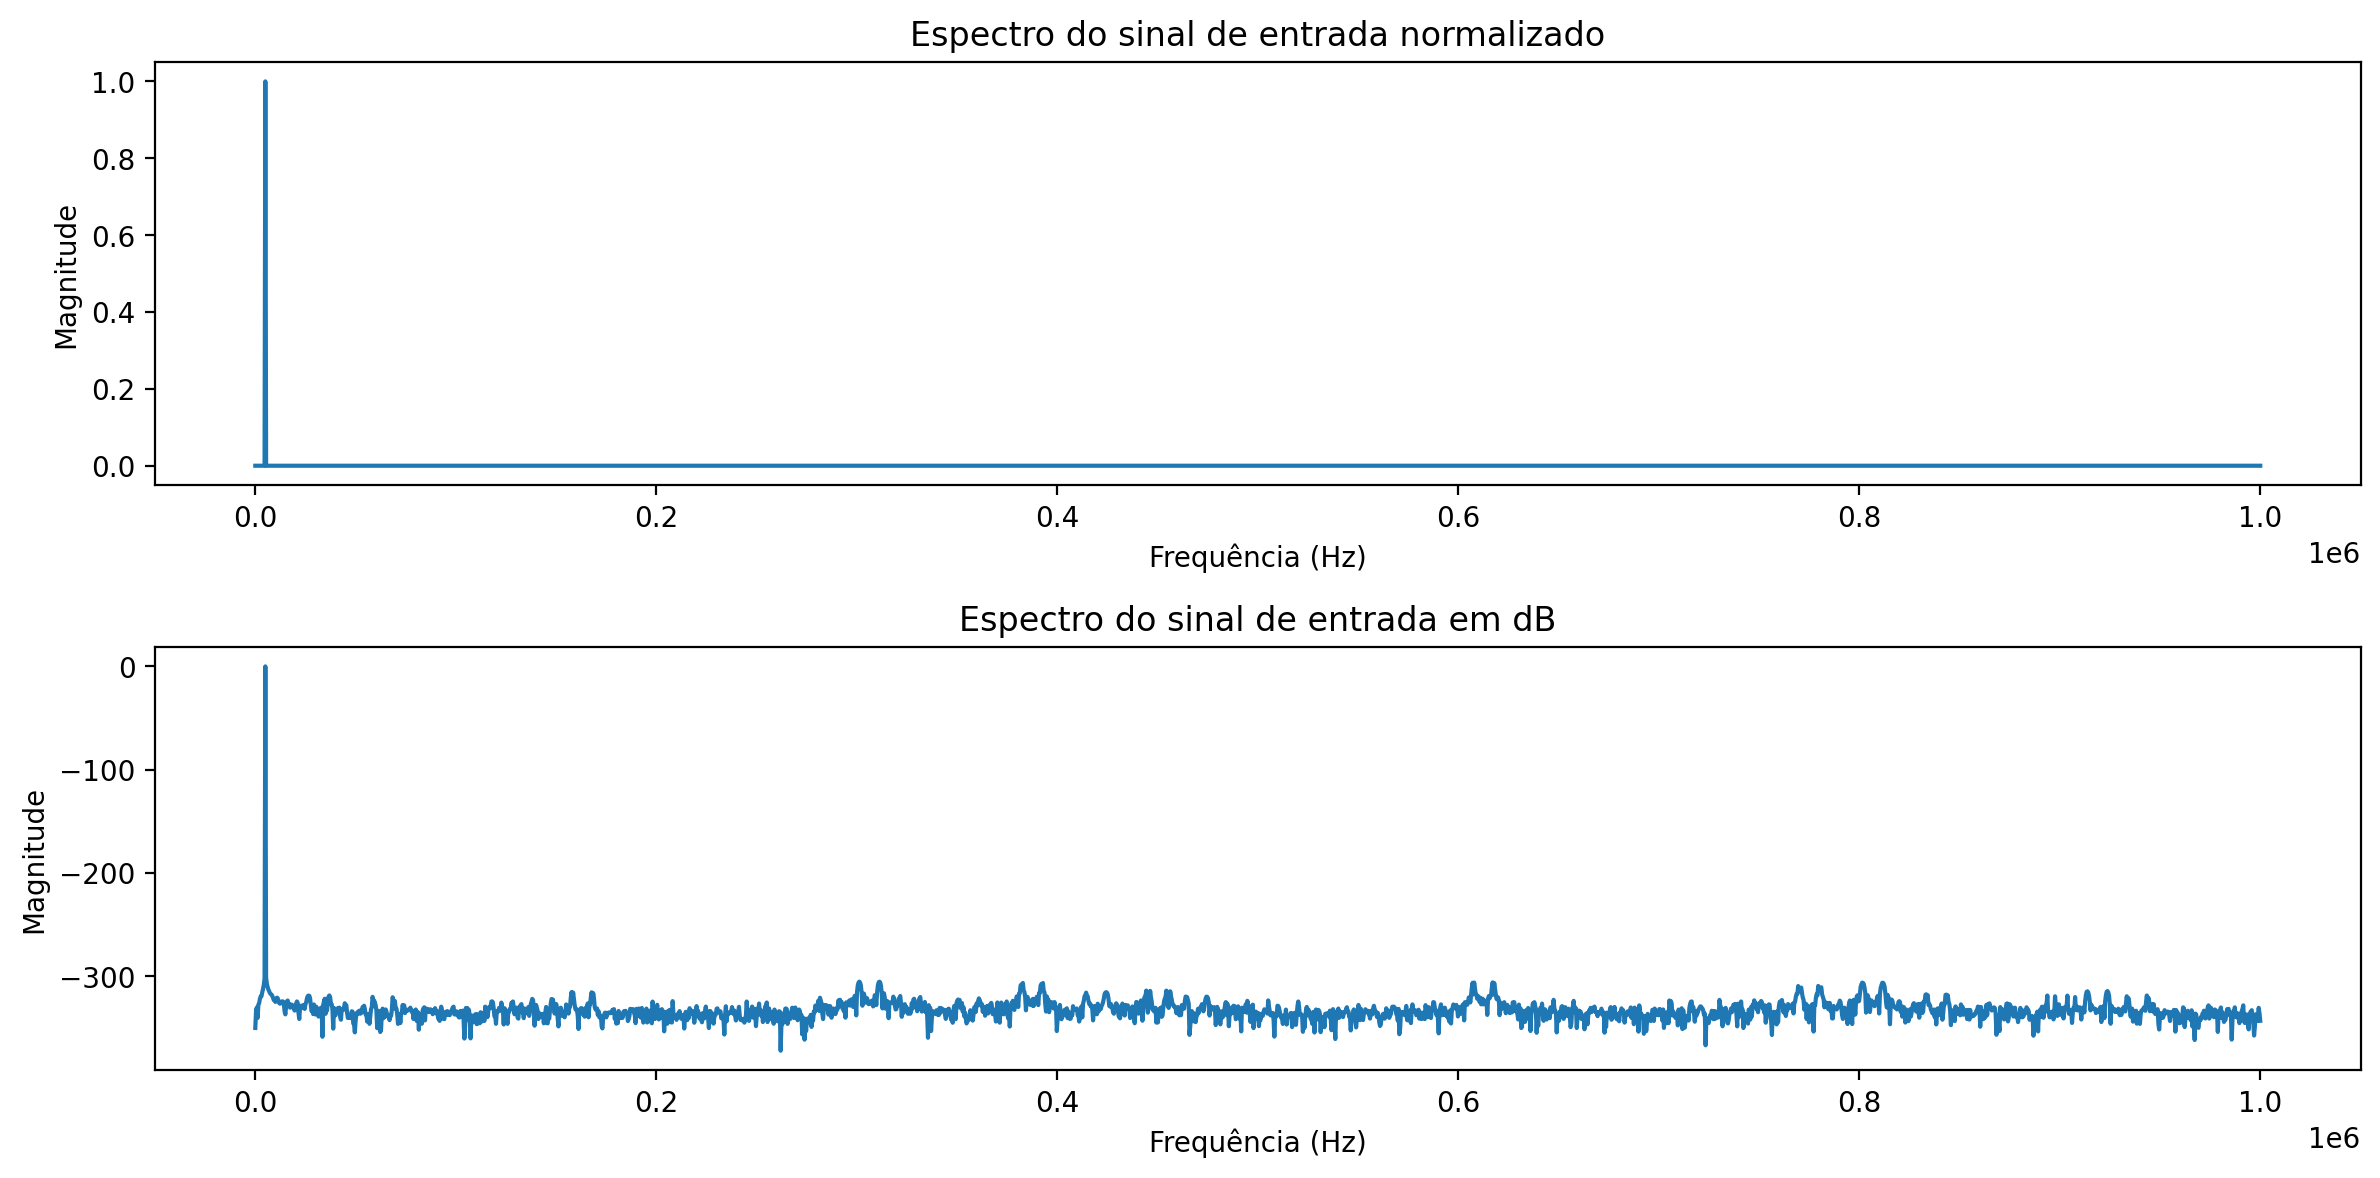

In [ ]:
# Análise spectral do sinal normalizado
sinalMaximaAmplitude = (np.max(np.abs(sinal)))
sinalFFTNormalizado = sinalFFT / sinalMaximaAmplitude
sinalMagnitudeNormalizado = (2 / sinalComprimento) * abs(sinalFFTNormalizado[0:np.size(eixoFrequenciaSinal)])

# Sinal de entrada
plt.subplot(2, 1, 1)
plt.plot(eixoFrequenciaSinal, sinalMagnitudeNormalizado)
plt.title('Espectro do sinal de entrada normalizado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Análise espectral
plt.subplot(2, 1, 2)
plt.plot(eixoFrequenciaSinal, 20*np.log10(sinalMagnitudeNormalizado))
plt.title('Espectro do sinal de entrada em dB')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

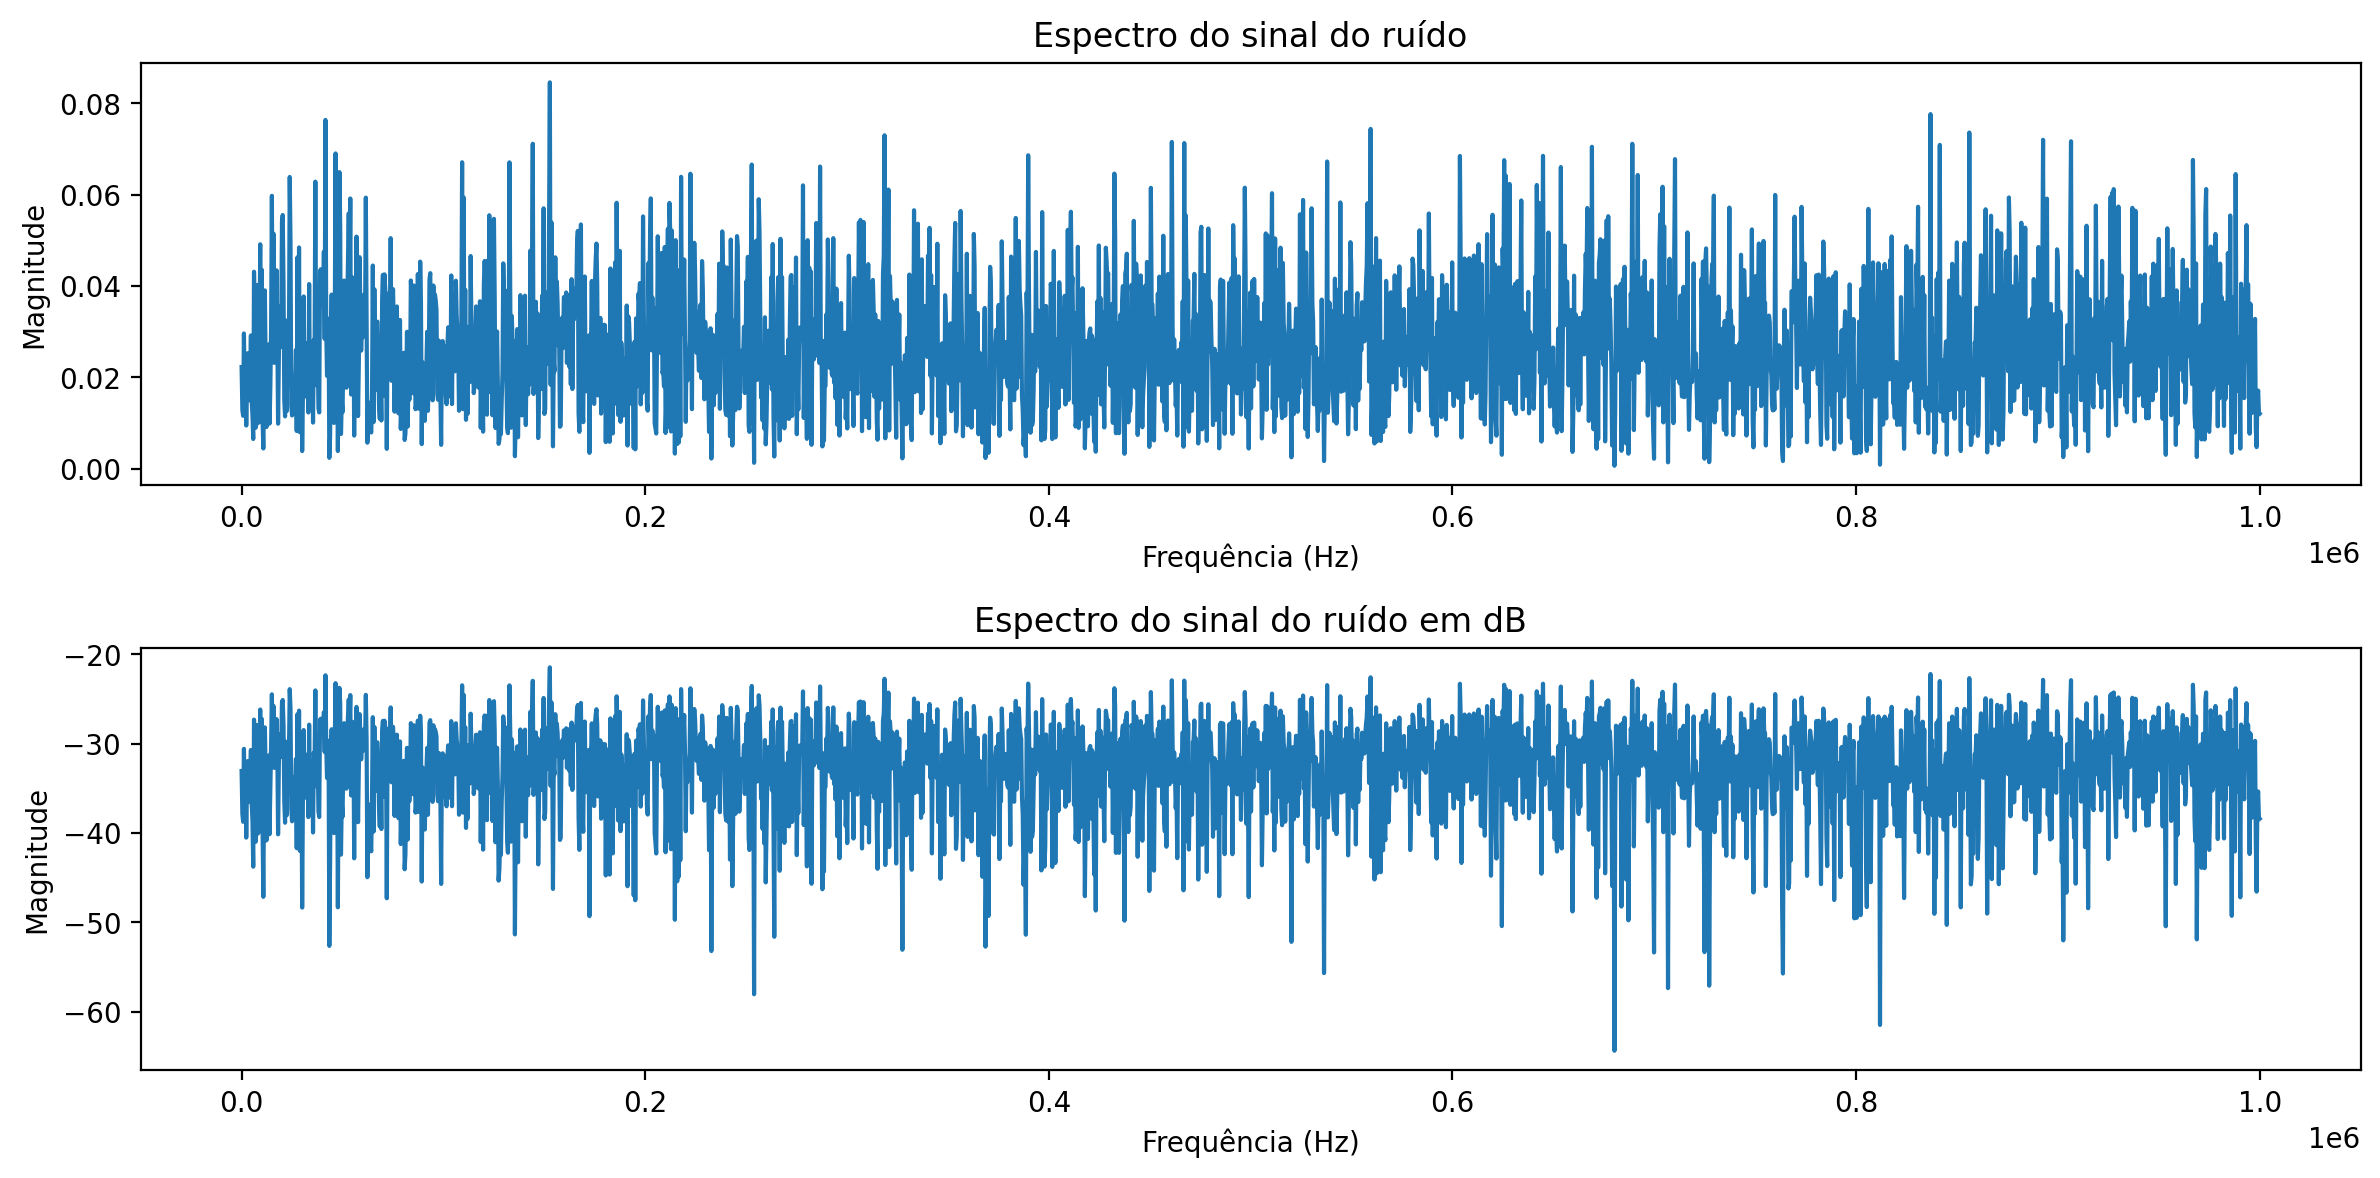

In [ ]:
# Análise spectral do ruído

ruidoBrancoFFT = abs(sf.fft(ruidoBranco))
ruidoBrancoComprimento = np.size(ruidoBranco)
eixoFrequenciaRuidoBranco =  (frequenciaAmostragem / 2) * np.linspace(0, 1, int(ruidoBrancoComprimento/2))
sinalMagnitude = (2 / ruidoBrancoComprimento) * abs(ruidoBrancoFFT[0:np.size(eixoFrequenciaRuidoBranco)])

plt.subplot(2, 1, 1)
plt.plot(eixoFrequenciaRuidoBranco, sinalMagnitude)
plt.title('Espectro do sinal do ruído')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.subplot(2, 1, 2)
plt.plot(eixoFrequenciaRuidoBranco, 20*np.log10(sinalMagnitude))
plt.title('Espectro do sinal do ruído em dB')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

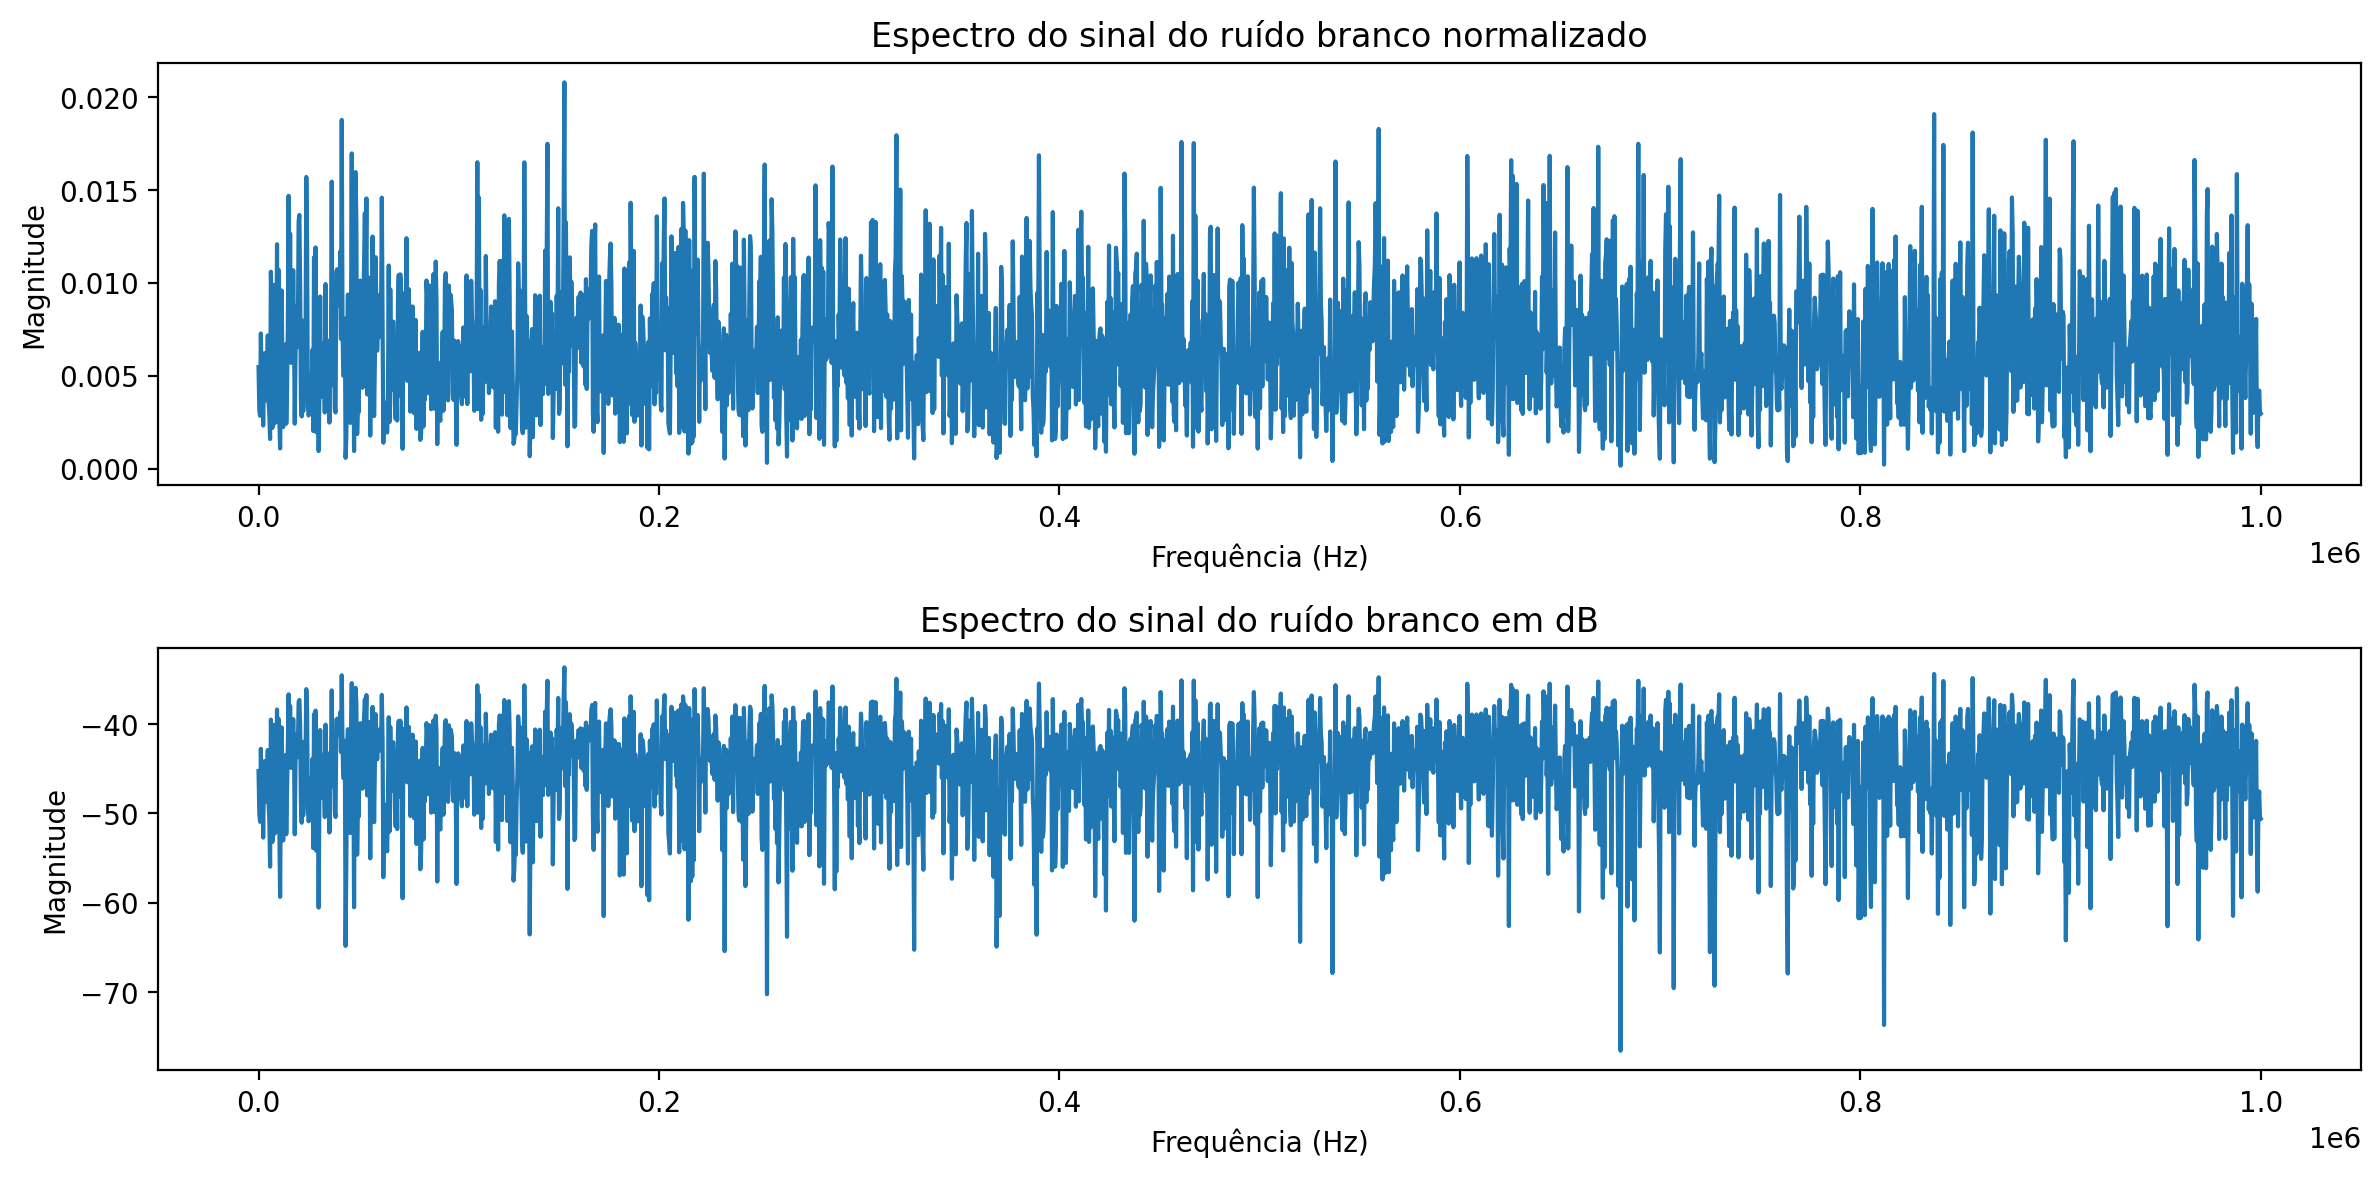

In [ ]:
# Análise spectral do ruído normalizado
ruidoBrancoMaximaAmplitude = (np.max(np.abs(ruidoBranco)))
ruidoBrancoFFTNormalizado = ruidoBrancoFFT / ruidoBrancoMaximaAmplitude
ruidoBrancoMagnitudeNormalizado = (2 / ruidoBrancoComprimento) * abs(ruidoBrancoFFTNormalizado[0:np.size(eixoFrequenciaRuidoBranco)])

# Ruído
plt.subplot(2, 1, 1)
plt.plot(eixoFrequenciaRuidoBranco, ruidoBrancoMagnitudeNormalizado)
plt.title('Espectro do sinal do ruído branco normalizado')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Análise espectral
plt.subplot(2, 1, 2)
plt.plot(eixoFrequenciaRuidoBranco, 20*np.log10(ruidoBrancoMagnitudeNormalizado))
plt.title('Espectro do sinal do ruído branco em dB')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

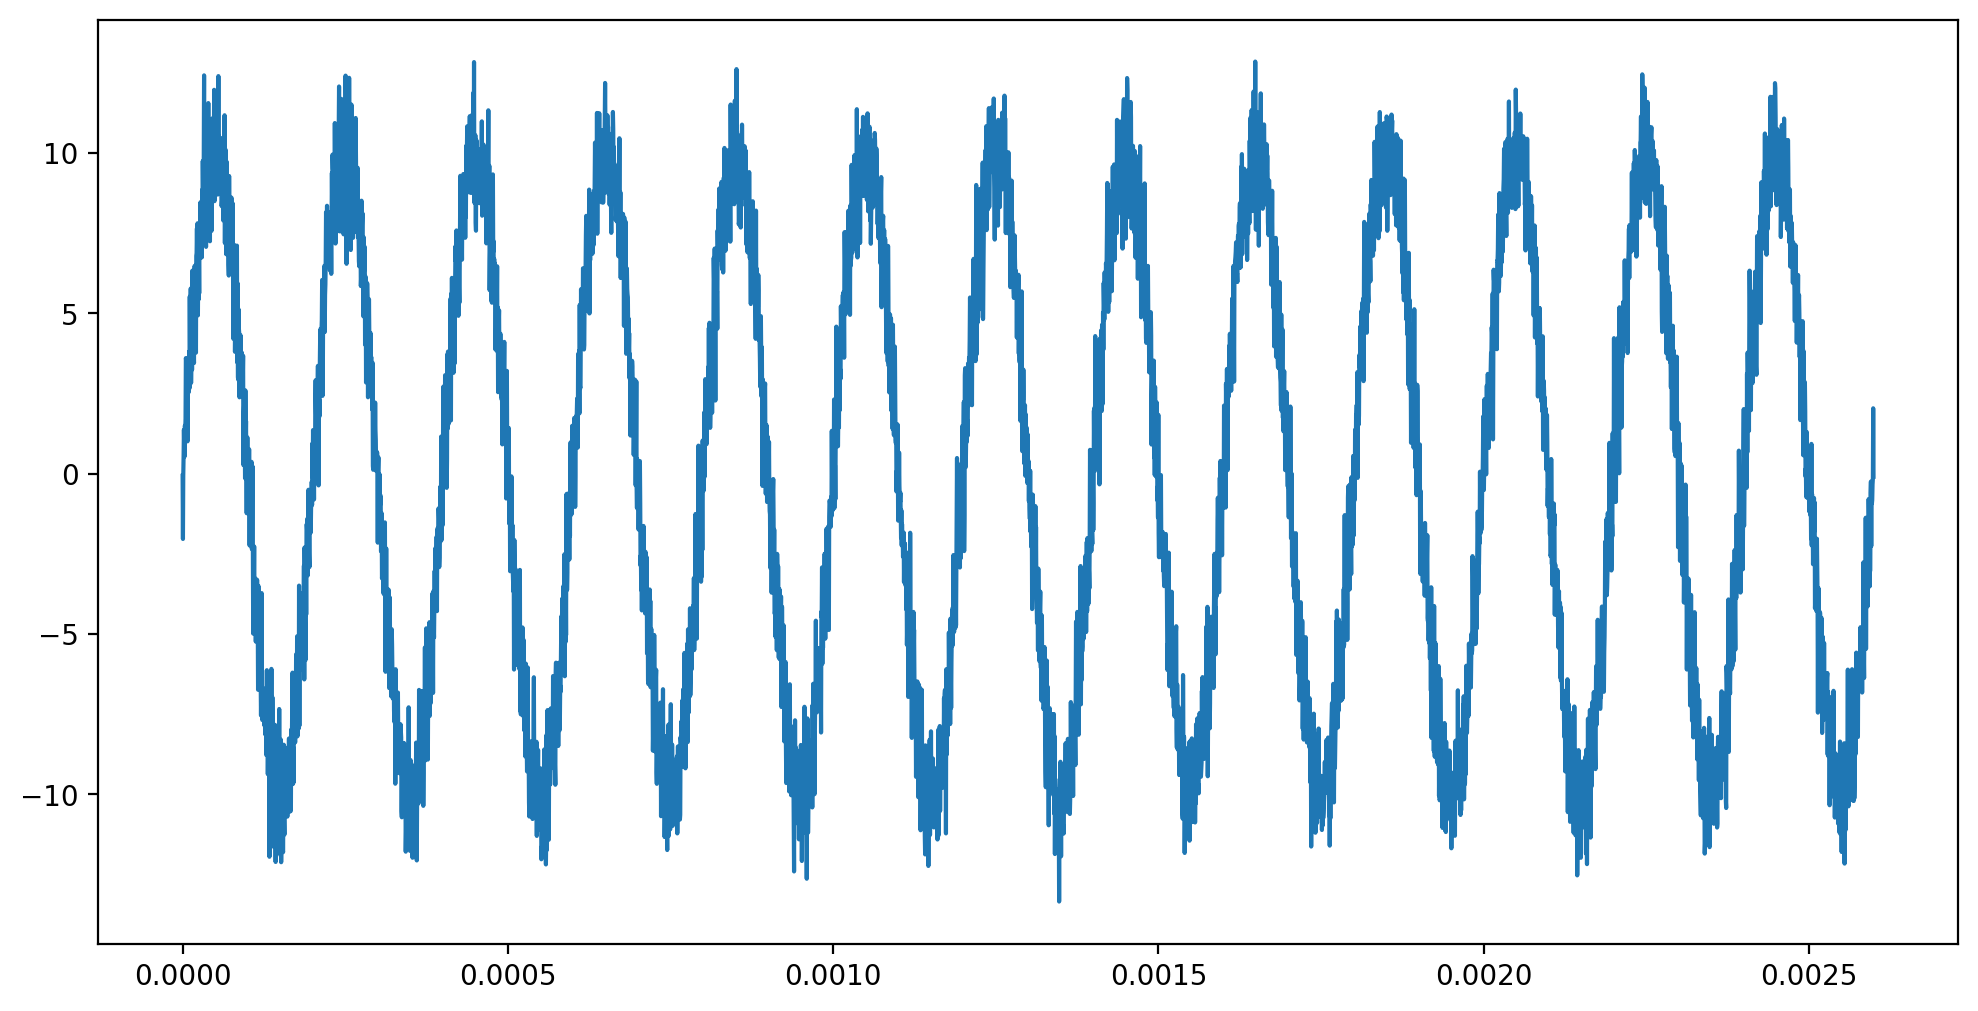

In [ ]:
sinalRuido = sinal + ruidoBranco

plt.plot(tempo, sinalRuido)

plt.show()

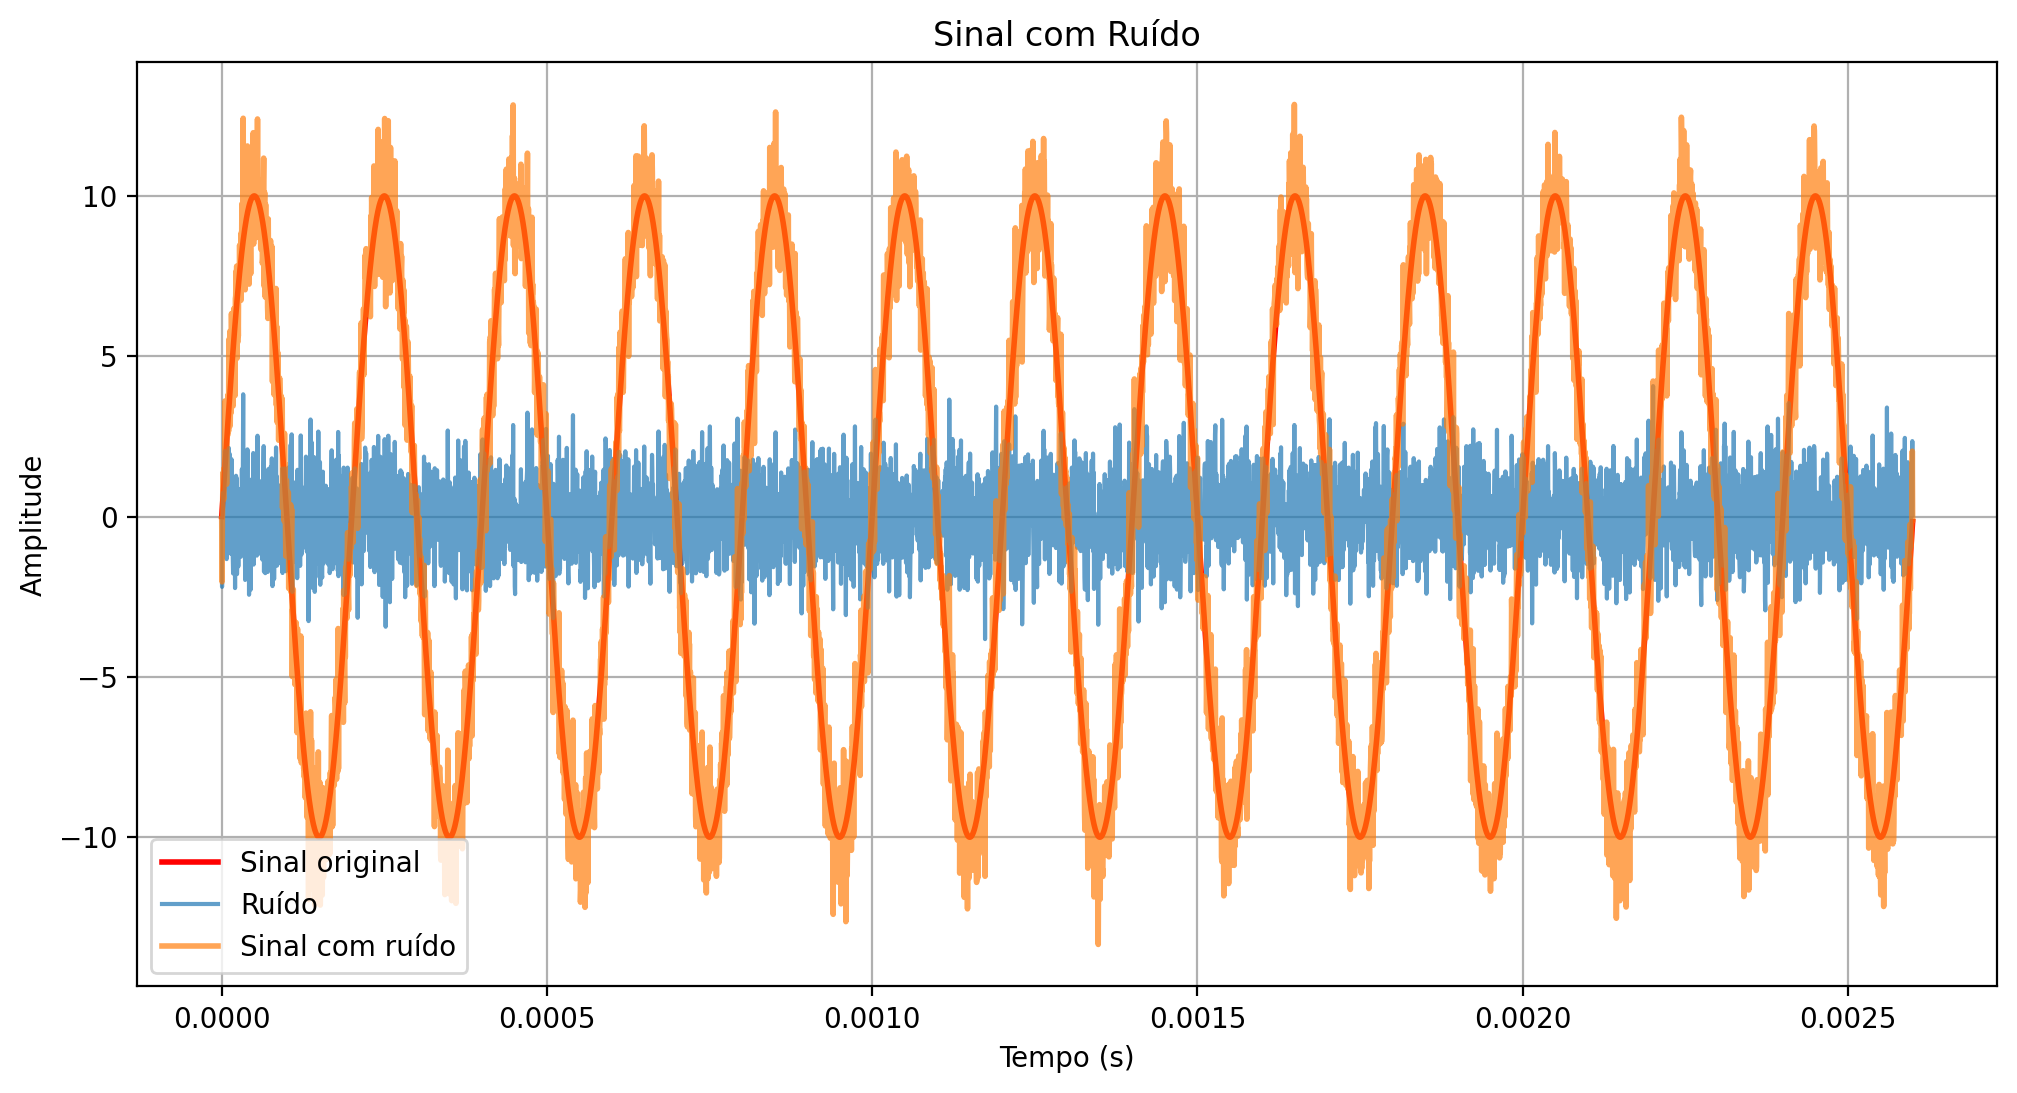

In [ ]:
plt.plot(tempo, sinal, label='Sinal original', linewidth=2, color='red')
plt.plot(tempo, ruidoBranco, label='Ruído', alpha=0.7)
plt.plot(tempo, sinalRuido, label='Sinal com ruído', linewidth=2, alpha=0.7)

plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal com Ruído')
plt.legend()
plt.grid(True)
plt.show()

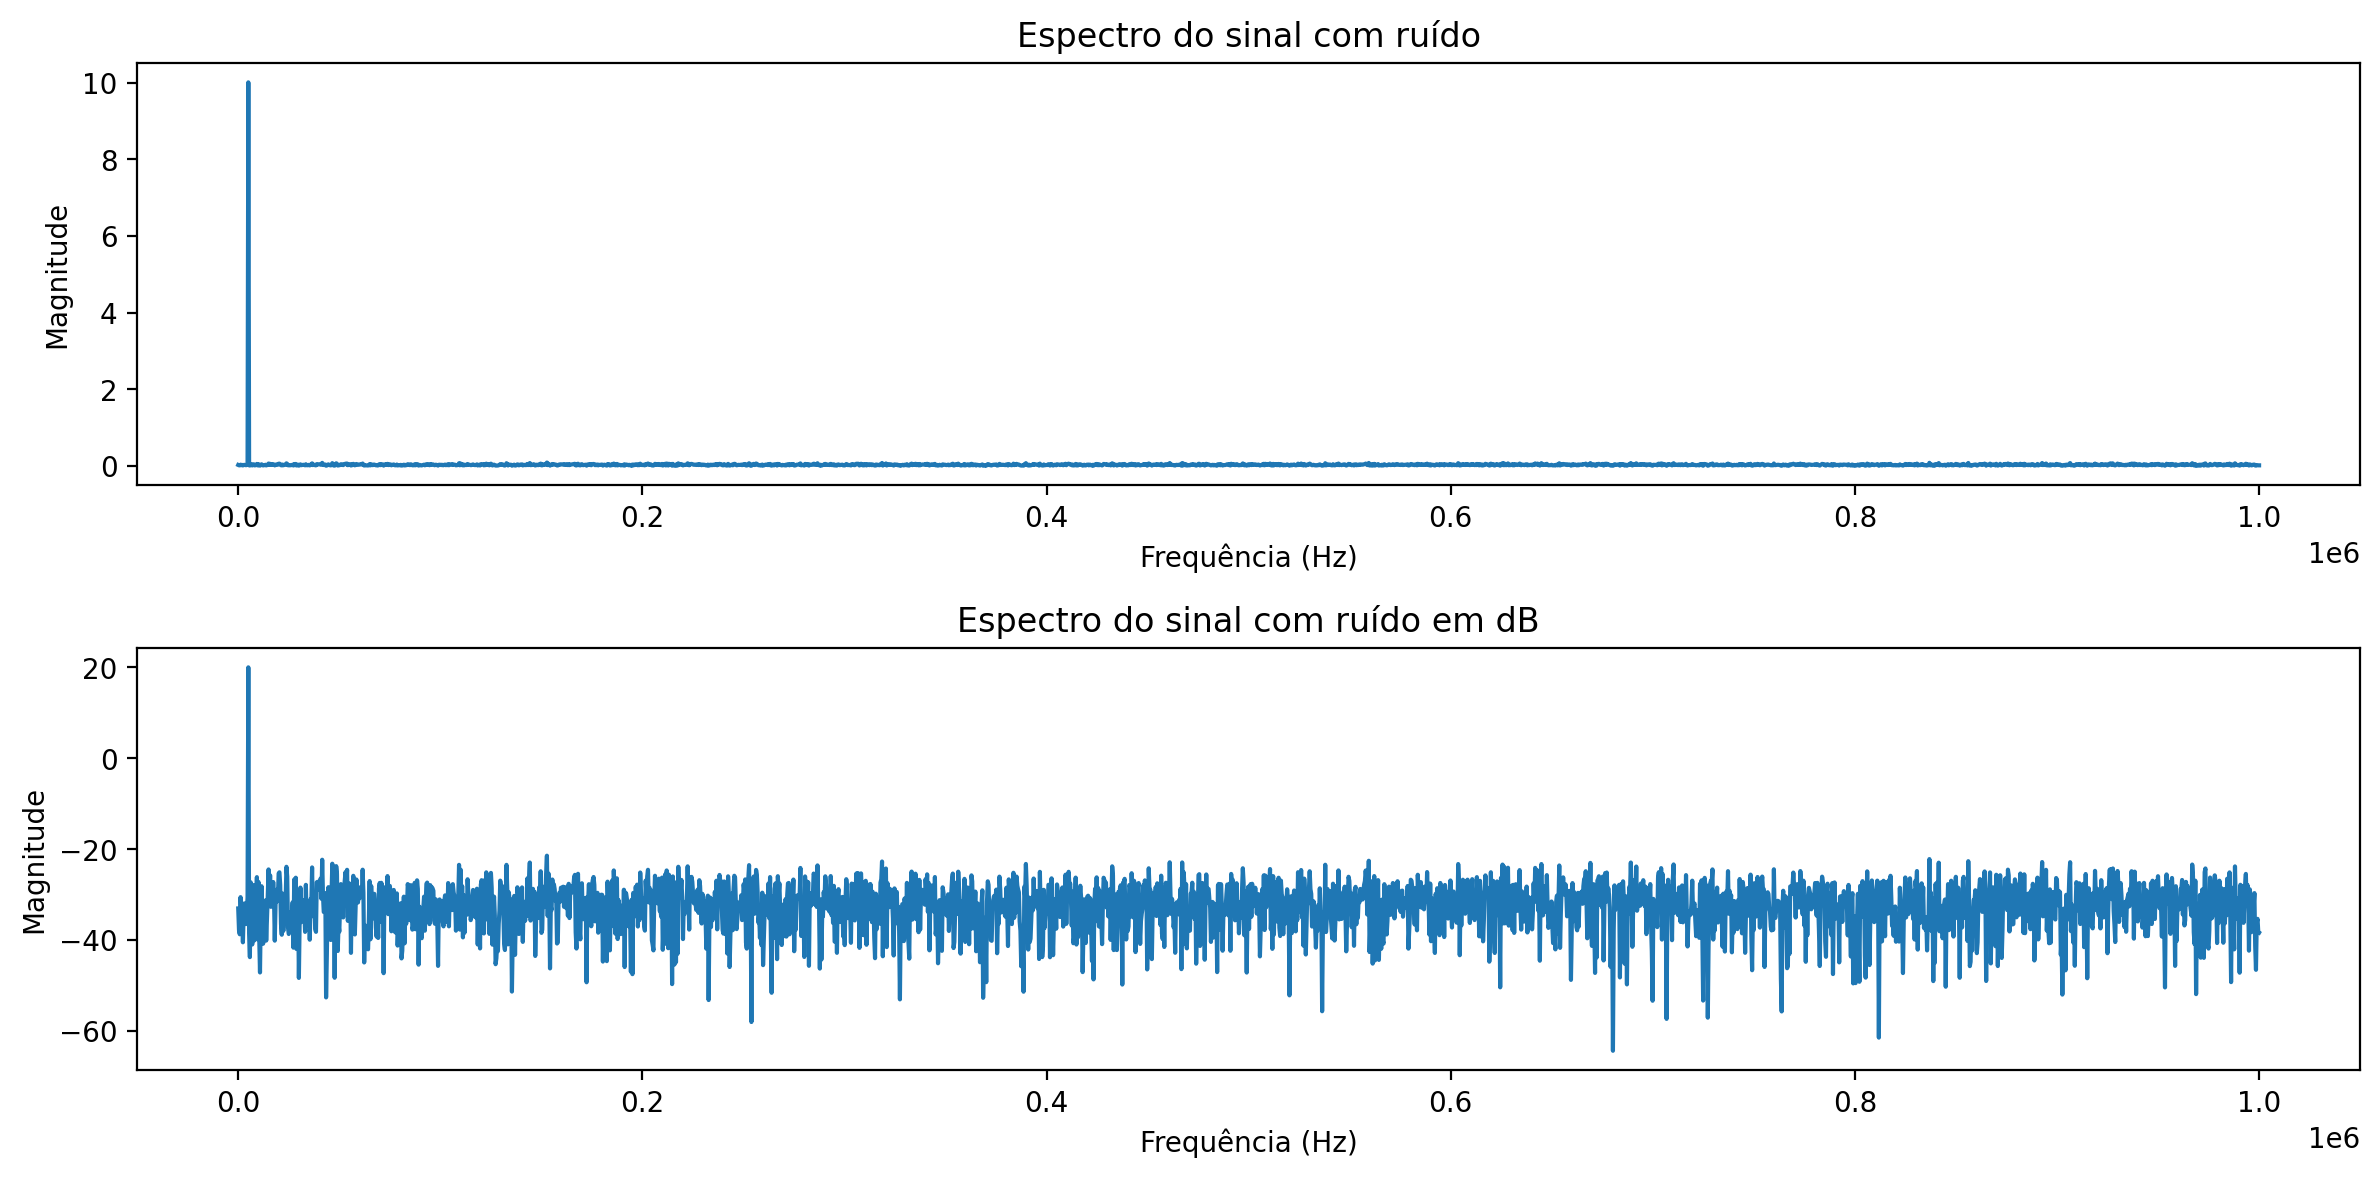

In [ ]:
# Análise spectral do sinal com ruído
sinalRuidoFFT = abs(sf.fft(sinalRuido))
sinalRuidoComprimento = np.size(sinalRuido)
eixoFrequenciaSinalRuido =  (frequenciaAmostragem / 2) * np.linspace(0, 1, int(sinalRuidoComprimento/2))
sinalRuidoMagnitude = (2 / sinalRuidoComprimento) * abs(sinalRuidoFFT[0:np.size(eixoFrequenciaSinalRuido)])

# Sinal com ruído
plt.subplot(2, 1, 1)
plt.plot(eixoFrequenciaSinalRuido, sinalRuidoMagnitude)
plt.title('Espectro do sinal com ruído')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Análise espectral
plt.subplot(2, 1, 2)
plt.plot(eixoFrequenciaSinalRuido, 20*np.log10(sinalRuidoMagnitude))
plt.title('Espectro do sinal com ruído em dB')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

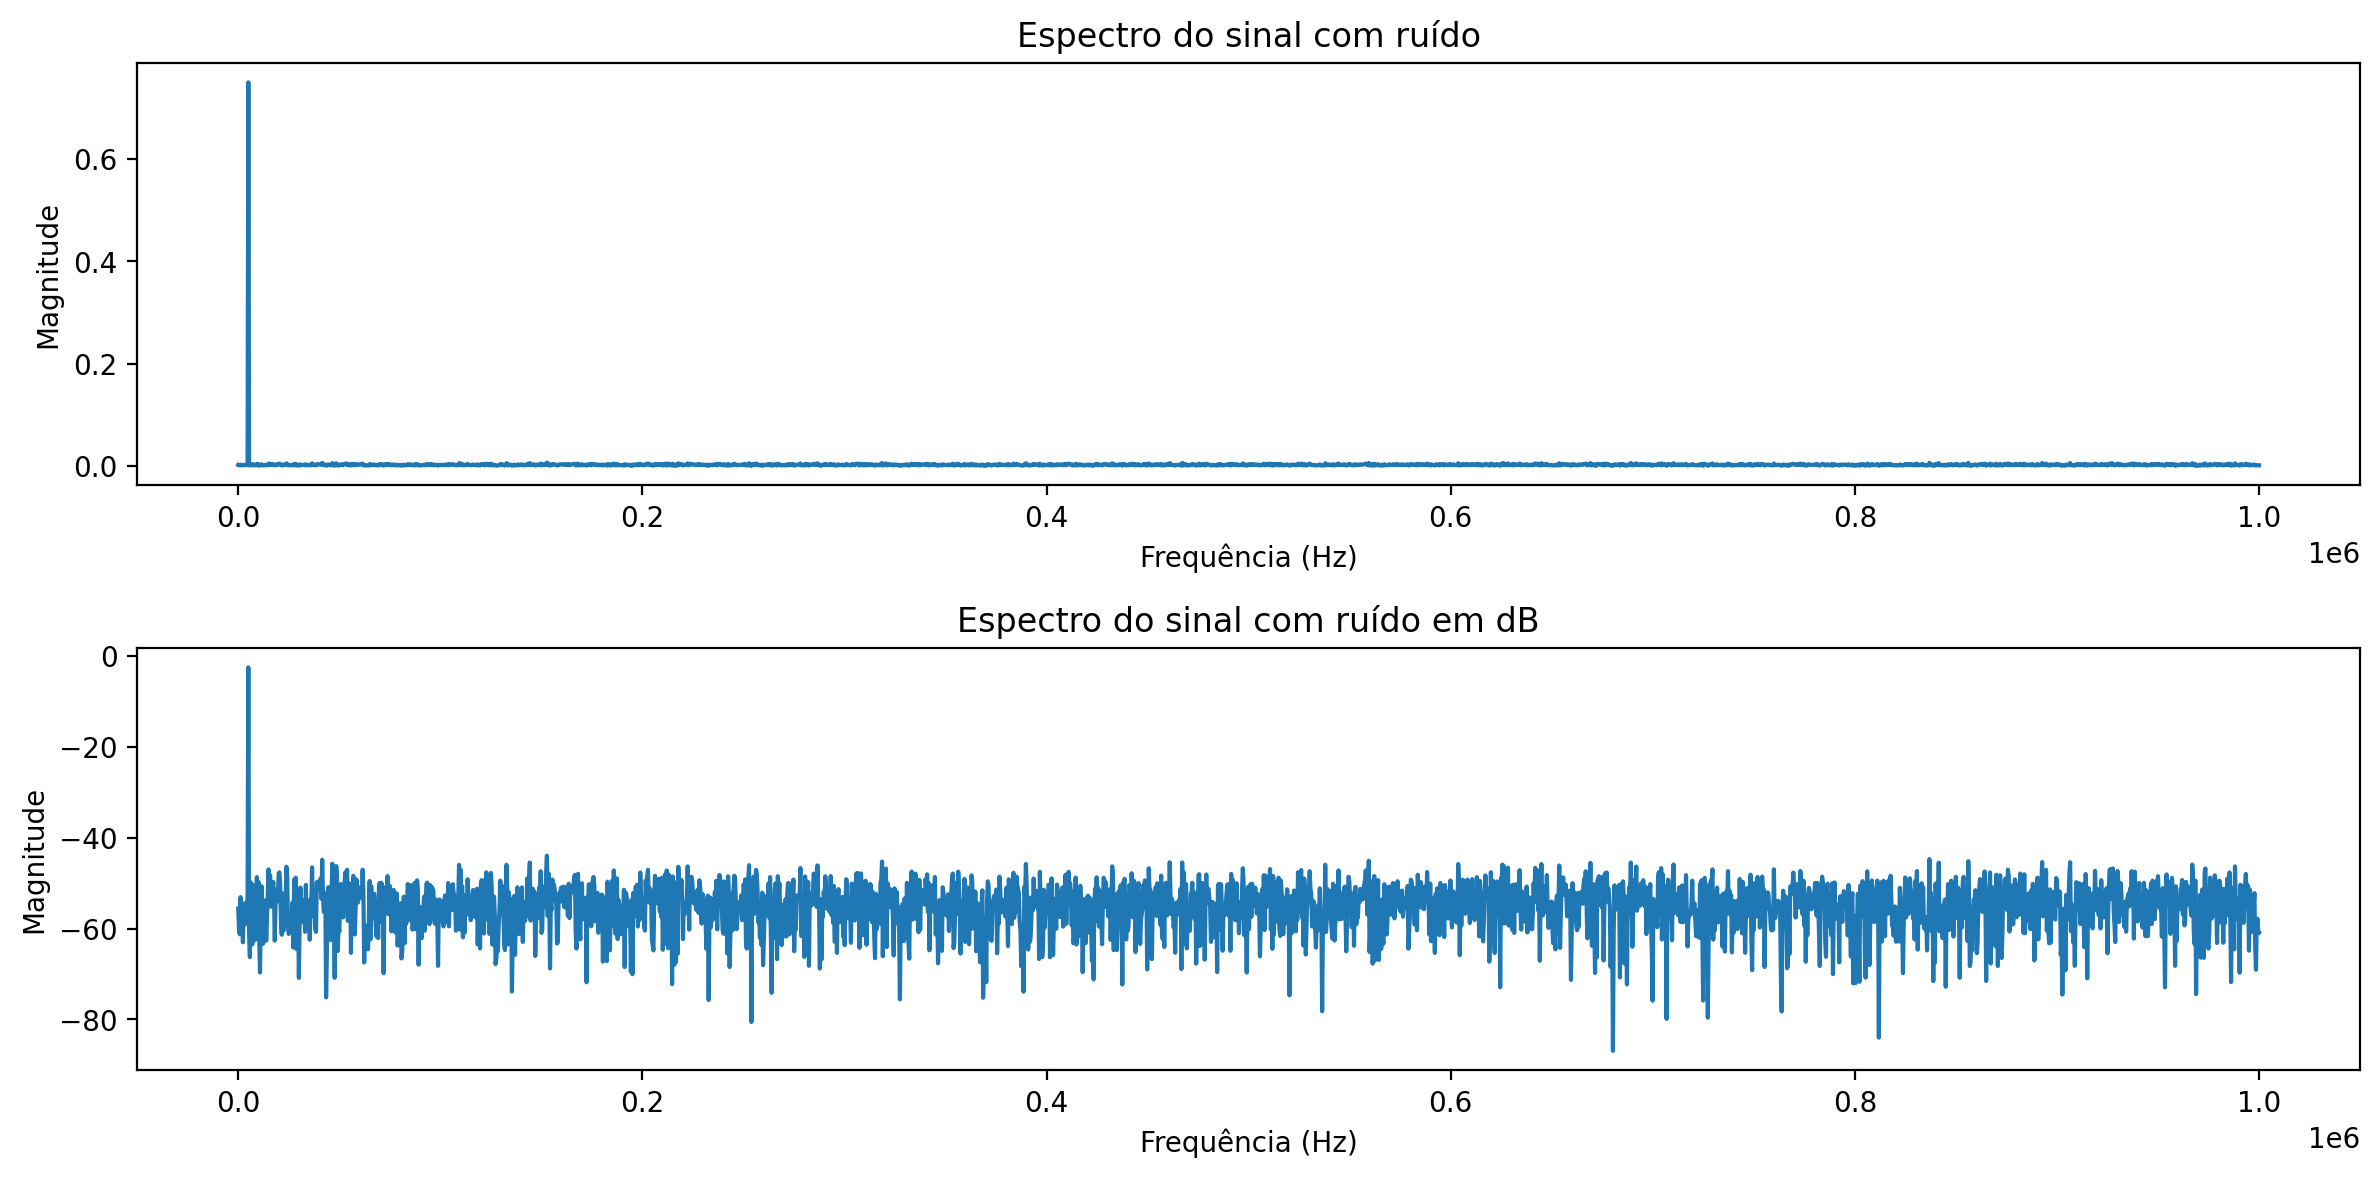

In [ ]:
# Análise spectral do sinal com ruído noramlizado
sinalRuidoMaximaAmplitude = (np.max(np.abs(sinalRuido)))
sinalRuidoFFTNormalizado = sinalRuidoFFT / sinalRuidoMaximaAmplitude
sinalRuidoMagnitudeNormalizado = (2 / sinalRuidoComprimento) * abs(sinalRuidoFFTNormalizado[0:np.size(eixoFrequenciaSinalRuido)])


# Sinal com ruído
plt.subplot(2, 1, 1)
plt.plot(eixoFrequenciaSinalRuido, sinalRuidoMagnitudeNormalizado)
plt.title('Espectro do sinal com ruído')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

# Análise espectral
plt.subplot(2, 1, 2)
plt.plot(eixoFrequenciaSinalRuido, 20*np.log10(sinalRuidoMagnitudeNormalizado))
plt.title('Espectro do sinal com ruído em dB')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')

plt.tight_layout()
plt.show()

/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


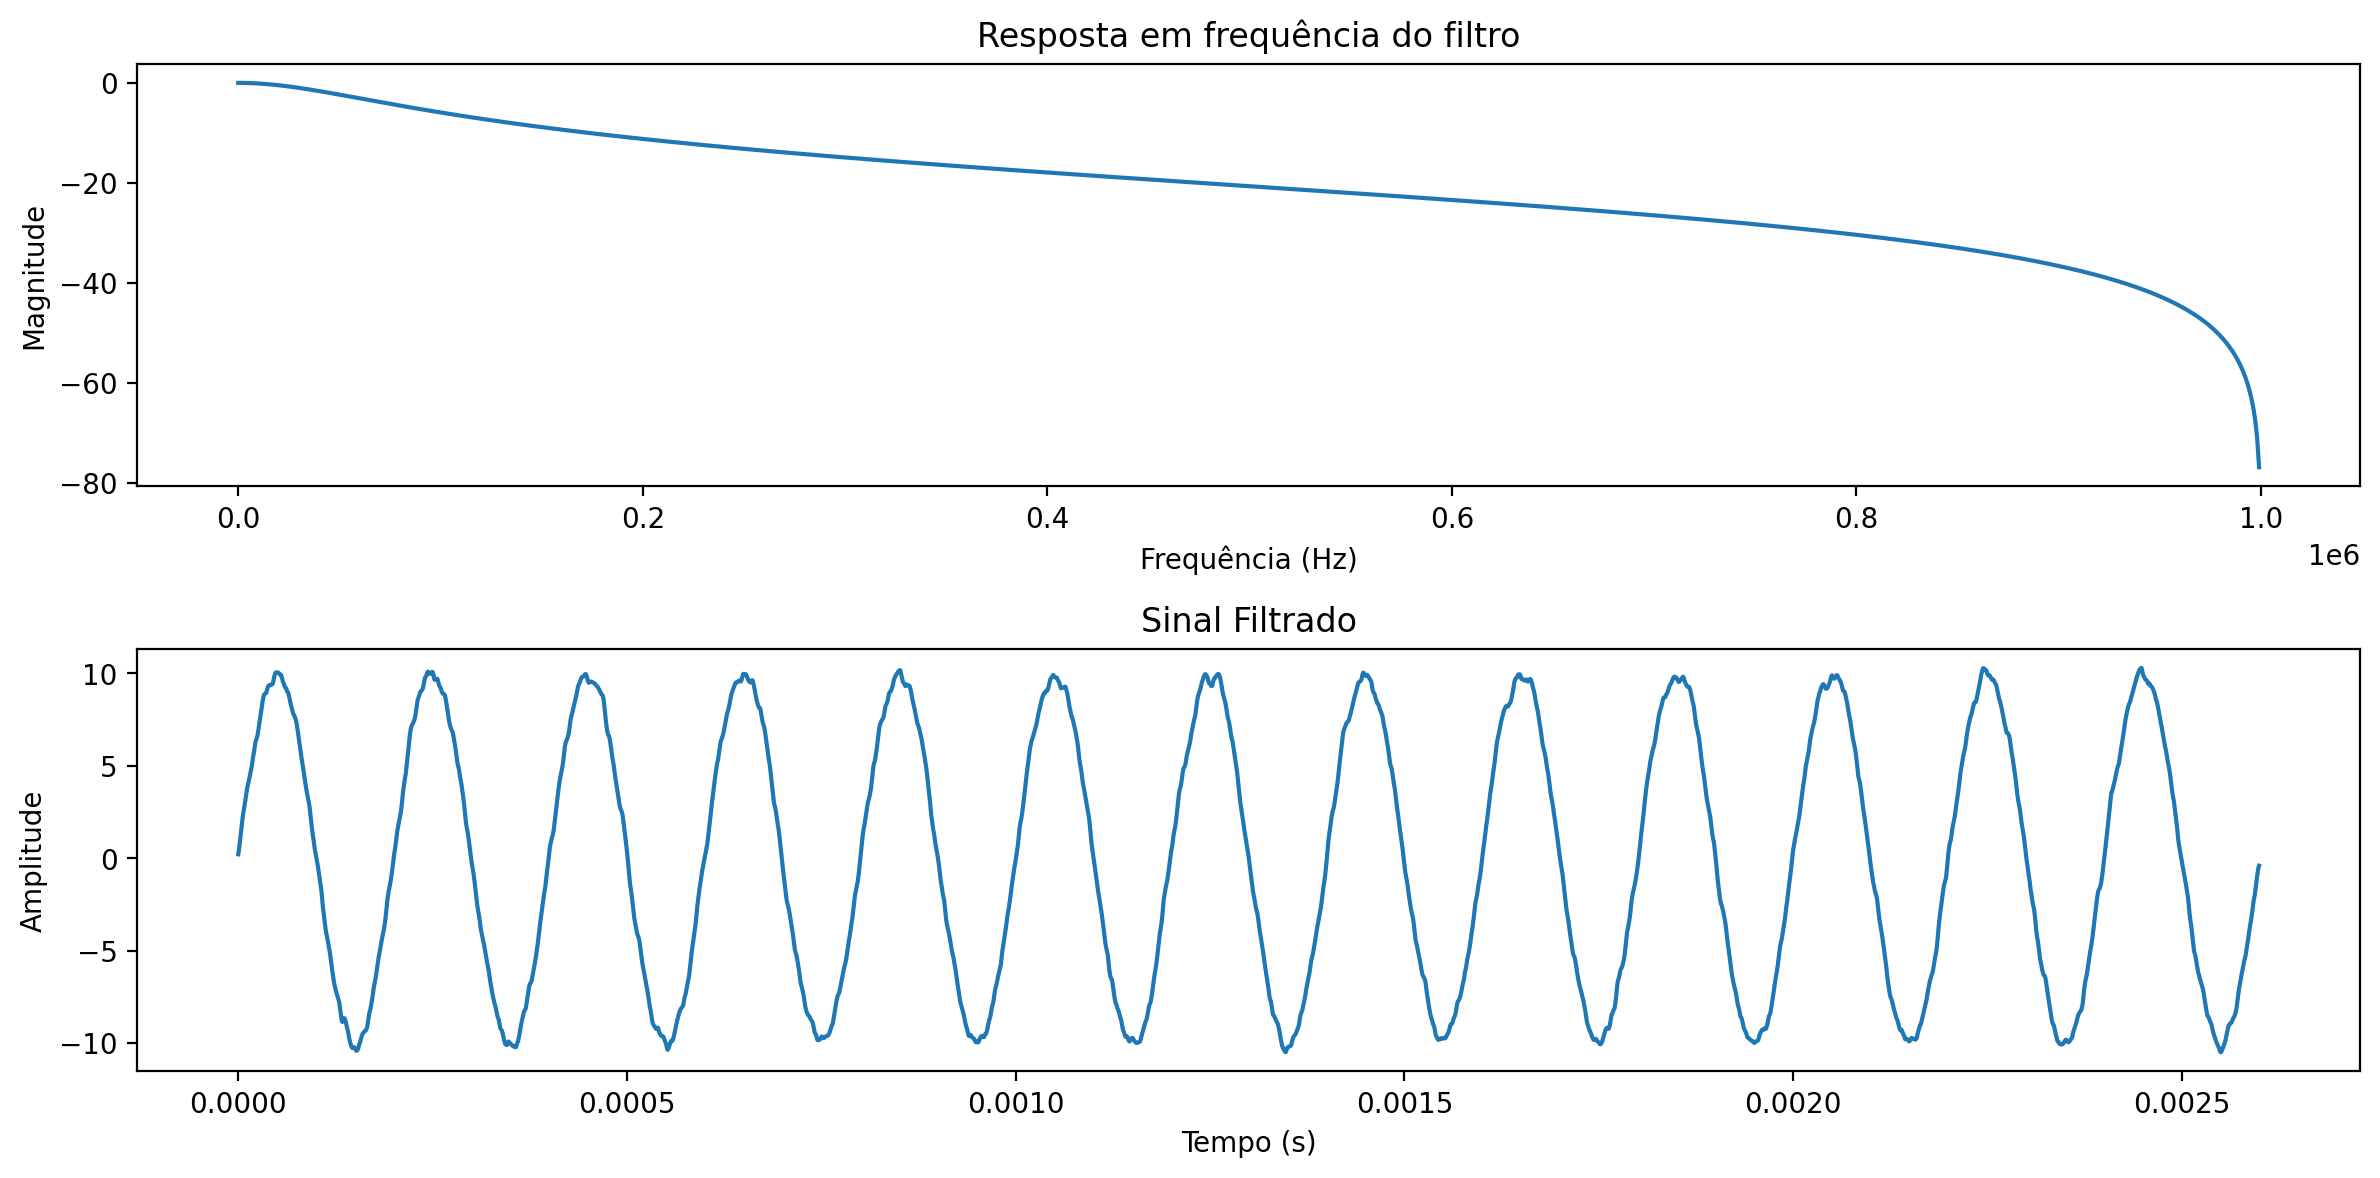

In [ ]:
# Filtro

R = 2.7e3
C = 1e-9

frequenciaCorte = 1 / (2 * np.pi * R * C)

w = frequenciaCorte / (frequenciaAmostragem / 2) # normalizando a frequencia
b, a = sig.butter(1, w, 'low')
sinalFiltrado = sig.filtfilt(b, a, sinalRuido)

W, h = sig.freqz(b, a, worN = 1024)
W = frequenciaAmostragem * W / (2 * np.pi)

plt.subplot(2, 1, 1)
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.title('Resposta em frequência do filtro')
plt.plot(W, 20 * np.log10(h))


plt.subplot(2, 1, 2)
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Sinal Filtrado')
plt.plot(tempo, sinalFiltrado)

plt.tight_layout()
plt.show()